In [13]:
import os
import numpy as np
import scipy.spatial.distance as sd
import matplotlib.pyplot as plt
from tesser import util
data_dir = '/Users/morton/Dropbox/data/tesser'
roi_dir = os.path.join(data_dir, 'item_betas', 'roi')

In [14]:
b_hip_ant = os.path.join(roi_dir, 'b_hip_ant', 'pattern_100.txt')
pattern = np.loadtxt(b_hip_ant)

In [10]:
pattern.shape

(906, 829)

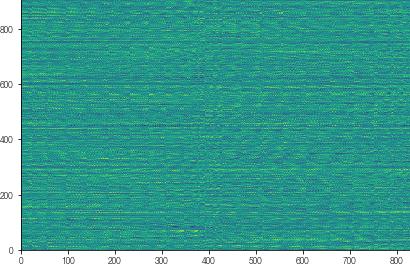

In [9]:
plt.pcolor(pattern)

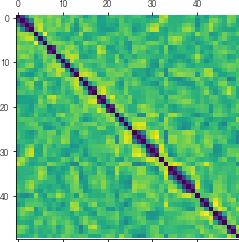

In [50]:
plt.matshow(sd.squareform(sd.pdist(pattern, 'correlation'))[:50, :50])

In [26]:
df = util.load_struct_df_all(data_dir, 100)
df.query('part == 2').index.to_numpy()

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148,   2,   3,   4,   5,   6,   7,   8,   9,  10,
        11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  3

In [37]:
from tesser import sr
alpha = .1
gamma = .9
n_state = 21
M = np.zeros((n_state, n_state))
SR_agent = sr.SRMatrix(gamma, alpha, n_state, M)

In [42]:
envstep = np.random.choice(np.arange(21), 1000)
envstep

array([ 5, 19,  3,  6, 17, 19, 16, 19, 11, 20, 17, 17, 15, 17,  8, 10,  8,
        9,  6,  9, 20,  6,  9, 18, 18, 18,  6, 13,  6, 15, 10,  9, 16, 14,
       20,  9, 14, 11,  2, 12, 17,  2,  0, 14,  4, 14, 18,  0,  2,  2, 18,
       19, 18, 16, 14,  5, 12, 13,  1,  0, 20, 10,  3, 16, 15,  0,  5,  8,
        5, 16, 15, 12, 11, 16, 14, 14, 13, 11, 13, 11, 10, 17, 15, 20,  0,
       10,  0, 18, 11, 14, 14, 14,  8,  4,  5, 15, 18,  6,  3,  3,  4,  7,
        1,  6, 11, 10,  2,  5, 12, 13,  9,  7, 10, 13,  2,  4,  6, 18, 14,
       18,  6,  1, 11,  7,  0, 14, 12, 17, 19, 12,  4, 12,  7,  1,  9, 20,
        8,  8,  4, 11, 14, 19, 15,  9,  7, 20,  9, 18,  1, 18,  3, 12,  1,
        5,  1, 19, 11, 18, 13,  5, 19, 17,  9, 16, 14, 19,  8,  1,  1,  8,
        8,  5, 14, 16, 12, 12,  7, 12, 20,  9, 19,  9,  6, 10, 19, 15, 20,
       18,  2, 13,  9, 18, 20,  4, 11, 15, 16,  9, 14, 12, 19, 15,  3,  2,
       19, 18,  7, 16,  6, 13,  9,  1, 17, 10, 16, 13, 20,  2,  1, 17, 19,
       16,  4,  0,  9, 19

In [43]:
s = envstep[0]
all_rows = np.zeros((len(envstep), n_state))
for i, s_new in enumerate(envstep[1:]):
    SR_agent.step(s, s_new)
    all_rows[i] = SR_agent.M[s_new]
    s = s_new

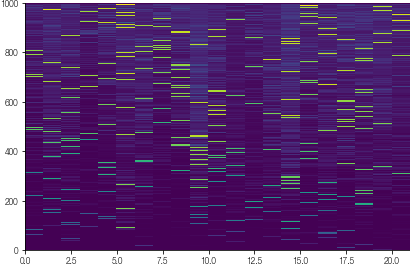

In [45]:
plt.pcolor(all_rows)

//anaconda3/envs/tesser/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


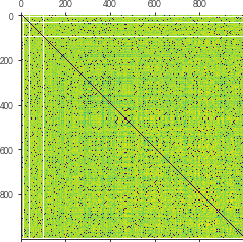

In [47]:
model_rdm = sd.squareform(sd.pdist(all_rows, 'correlation'))
plt.matshow(model_rdm)

In [48]:
np.count_nonzero(np.isnan(model_rdm))

41538